# A small experiment with temperature profiles in metpy

If you run the parcel profile with dewpoint higher than the air temperature, it will condensate the water and cool down the whole thing. The parcel profile follows the moist lapse if the temperature and dewpoint are the same at the surface. 

Below a quick calculation of the profiles. The purple profile gets colder at the surface compared to what it was supposed to start with. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import metpy

import metpy.calc as mpcalc


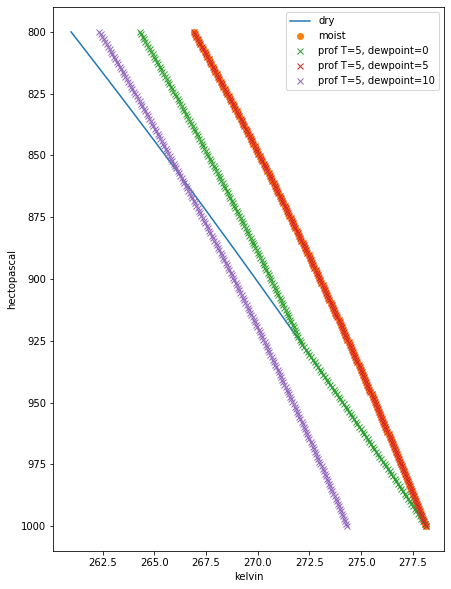

In [3]:
p = np.linspace(1000, 800, 200) * metpy.units.units.hPa

t0 = 0 * metpy.units.units.celsius
t5 = 5 * metpy.units.units.celsius
t10 = 10 * metpy.units.units.celsius

dry = mpcalc.dry_lapse(p, t5)
moist = mpcalc.moist_lapse(p, t5)

plt.figure(figsize=(7,10))

plt.plot(dry, p, '-', label='dry')
plt.plot(moist, p, 'o', label='moist')
for t in [t0,t5,t10]:
    prof = mpcalc.parcel_profile(p, t5, t)
    plt.plot(prof, p, 'x', label='prof T=5, dewpoint={}'.format(t.magnitude))

plt.gca().invert_yaxis()

plt.legend()
plt.show()

In [7]:
print(273.15 * metpy.units.units.kelvin >= 0 * metpy.units.units.celsius)

True
